In [1]:
import os
import sys
IS_GCOLAB = 'google.colab' in sys.modules

In [2]:
from pathlib import Path

_base_libpath = Path(
    "/content/drive/MyDrive" if IS_GCOLAB else f"{os.environ['HOME']}"
) / "_self_research/24.09.world_cuisine"

print(_base_libpath)

assert _base_libpath.exists()

os.chdir(_base_libpath)

/home/is/frederikus-h/_self_research/24.09.world_cuisine


In [3]:
if IS_GCOLAB:
    raise NotImplementedError()
    # from google.colab import drive
    # drive.mount('/content/drive')

else:
    print(">>> Not on Google Colab <<<")

>>> Not on Google Colab <<<


---

In [4]:
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
# @title ##### Set `country_count_data`
country_count_data = {
 'Indonesia': 143,
 'Philippines': 133,
 'United Kingdom': 80,
 'Afghanistan': 15,
 'Bangladesh': 33,
 'Bhutan': 17,
 'India': 129,
 'Maldives': 7,
 'Nepal': 37,
 'Pakistan': 44,
 'Sri Lanka': 32,
 'Malaysia': 78,
 'Spain': 87,
 'Nigeria': 32,
 'Ghana': 13,
 'Iran': 65,
 'Iraq': 29,
 'Myanmar': 34,
 'Thailand': 58,
 'China': 177,
 'Taiwan': 28,
 'Japan': 182,
 'Singapore': 58,
 'Italy': 99,
 'Peru': 22,
 'Puerto Rico': 17,
 'United States': 216,
 'Cuba': 23,
 'Dominican Republic': 18,
 'Venezuela': 17,
 'Colombia': 21,
 'United Arab Emirates': 12,
 'Saudi Arabia': 24,
 'Vietnam': 44,
 'Korea': 66,
 'France': 117,
 'Luxembourg': 4,
 'Belgium': 20,
 'Switzerland': 27,
 'Canada': 43,
 'Portugal': 57,
 'Trinidad and Tobago': 16,
 'Guyana': 7,
 'Suriname': 10,
 'Jamaica': 32,
 'Mauritius': 3,
 'Fiji': 5,
 'Turkey': 69,
 'Algeria': 28,
 'Egypt': 38,
 'Libya': 23,
 'Syria': 38,
 'Lebanon': 34,
 'Jordan': 29,
 'Israel': 48,
 'Palestine': 30,
 'Greece': 42,
 'Cyprus': 26,
 'Bulgaria': 41,
 'North Macedonia': 24,
 'Albania': 32,
 'Montenegro': 23,
 'Serbia': 36,
 'Bosnia and Herzegovina': 29,
 'Croatia': 49,
 'Nicaragua': 8,
 'Costa Rica': 5,
 'Cambodia': 15,
 'Netherlands': 32,
 'Senegal': 8,
 'Yemen': 18,
 'Brunei Darussalam': 20,
 'Laos': 14,
 'Georgia': 16,
 'Czech Republic': 20,
 'Slovakia': 15,
 'Uzbekistan': 10,
 'Armenia': 21,
 'Azerbaijan': 18,
 'Russia': 76,
 'Kazakhstan': 10,
 'Kyrgyzstan': 7,
 'Tajikistan': 7,
 'Turkmenistan': 5,
 'Romania': 47,
 'Ethiopia': 15,
 'Eritrea': 10,
 'Tanzania': 7,
 'Kenya': 7,
 'Somalia': 8,
 'Anguilla': 1,
 'Bahamas': 9,
 'Barbados': 8,
 'Haiti': 11,
 'Global': 80,
 'Benin': 7,
 'Guinea': 3,
 'Togo': 7,
 'Burkina Faso': 4,
 "Côte d'Ivoire": 6,
 'Moldova': 18,
 'Mexico': 132,
 'Poland': 45,
 'Hong Kong': 22,
 'Macau': 7,
 'Germany': 77,
 'Australia': 32,
 'Mongolia': 5,
 'Austria': 46,
 'Liechtenstein': 5,
 'New Zealand': 20,
 'Ukraine': 42,
 'Belarus': 29,
 'Hungary': 31,
 'Slovenia': 39,
 'England': 67,
 'South Africa': 32,
 'Sweden': 27,
 'Scotland': 15,
 'Brazil': 54,
 'Tunisia': 34,
 'Mauritania': 9,
 'Morocco': 25,
 'Guatemala': 14,
 'Antigua and Barbuda': 7,
 'Dominica': 8,
 'Grenada': 8,
 'Saint Kitts and Nevis': 7,
 'Saint Lucia': 7,
 'Saint Vincent and the Grenadines': 7,
 'Lithuania': 21,
 'Argentina': 25,
 'Bolivia': 16,
 'Paraguay': 11,
 'Uruguay': 17,
 'Ecuador': 16,
 'El Salvador': 11,
 'Chile': 23,
 'Bahrain': 11,
 'Kuwait': 12,
 'Oman': 10,
 'Qatar': 10,
 'Denmark': 22,
 'Ireland': 23,
 'Norway': 16,
 'Sudan': 10,
 'Western Sahara': 1,
 'Finland': 19,
 'Latvia': 15,
 'Estonia': 13,
 'Comoros': 3,
 'Djibouti': 4,
 'Macedonia': 5,
 'Malta': 5,
 'Iceland': 4,
 'Faroe Islands': 1,
 'Mozambique': 5,
 'Timor Leste': 2,
 'Panama': 6,
 'Angola': 5,
 'Cabo Verde': 5,
 'Monaco': 1,
 'Honduras': 3,
 'Cameroon': 8,
 'Zimbabwe': 3,
 'Malawi': 2,
 'Namibia': 3,
 'Botswana': 6,
 'Lesotho': 3,
 'Eswatini': 2,
 'Zambia': 3,
 'Congo': 3,
 'Niger': 4,
 'Mali': 5,
 'Uganda': 7,
 'Seychelles': 1,
 'South Sudan': 2,
 'Gambia': 3,
 'Guinea-Bissau': 2,
 'Liberia': 3,
 'Sierra Leone': 4,
 'Burundi': 1,
 'Democratic Republic of the Congo': 2,
 'Rwanda': 1,
 'South Korea': 3,
 'North Korea': 1,
 'Wales': 3,
 'Timor-Leste': 1,
 'Guernsey': 1,
 'Belize': 2,
 'Chad': 2,
 'Madagascar': 1,
 'Central African Republic': 1
}

In [6]:
mapper = {
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Macedonia": "North Macedonia",
    "Korea": "South Korea",
    "Hong Kong": "China",
}

In [7]:
world_s = gpd.read_file("geopandas/ne_110m_admin_0_countries")  # Small scale data
world_m = gpd.read_file("geopandas/ne_50m_admin_0_countries")  # Medium scale data
world_l = gpd.read_file("geopandas/ne_10m_admin_0_countries")  # Large scale data

In [8]:
# @title  ### Draw the Cartesian Globa
def get_world(world):
    world = world.copy()
    world_names = set(world.NAME.tolist() + world.NAME_LONG.tolist())

    country_count = {}
    for k, v in country_count_data.items():
        k = mapper[k] if k not in world_names and k in mapper else k
        if k not in world_names:
            continue
        country_count.setdefault(k, 0)
        country_count[k] += v

    world.loc[:,"country_count"] = world.apply(
        lambda r: (
            country_count[r.NAME] if r.NAME in country_count else
            country_count[r.NAME_LONG] if r.NAME_LONG in country_count else
            0),
        axis=1
    )
    return world


def show(world, save_path=None):
    col = "country_count"

    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot()

    world.plot(
        ax=ax,
        column=col,
        cmap="YlOrRd",
        edgecolor="black",
        alpha=0.6,
        legend=True,
        norm=LogNorm(vmin=1, vmax=world[col].max()),
        legend_kwds={'shrink': 0.67, 'pad': 0.01},
    )
    ax.set_xticks([])
    ax.set_yticks([])

    if save_path:
        plt.savefig(f"{save_path}.svg", format="svg", bbox_inches='tight')
    plt.show()

In [ ]:
# @title #### Small Scale Data
show(get_world(world_s), "geodist_s")

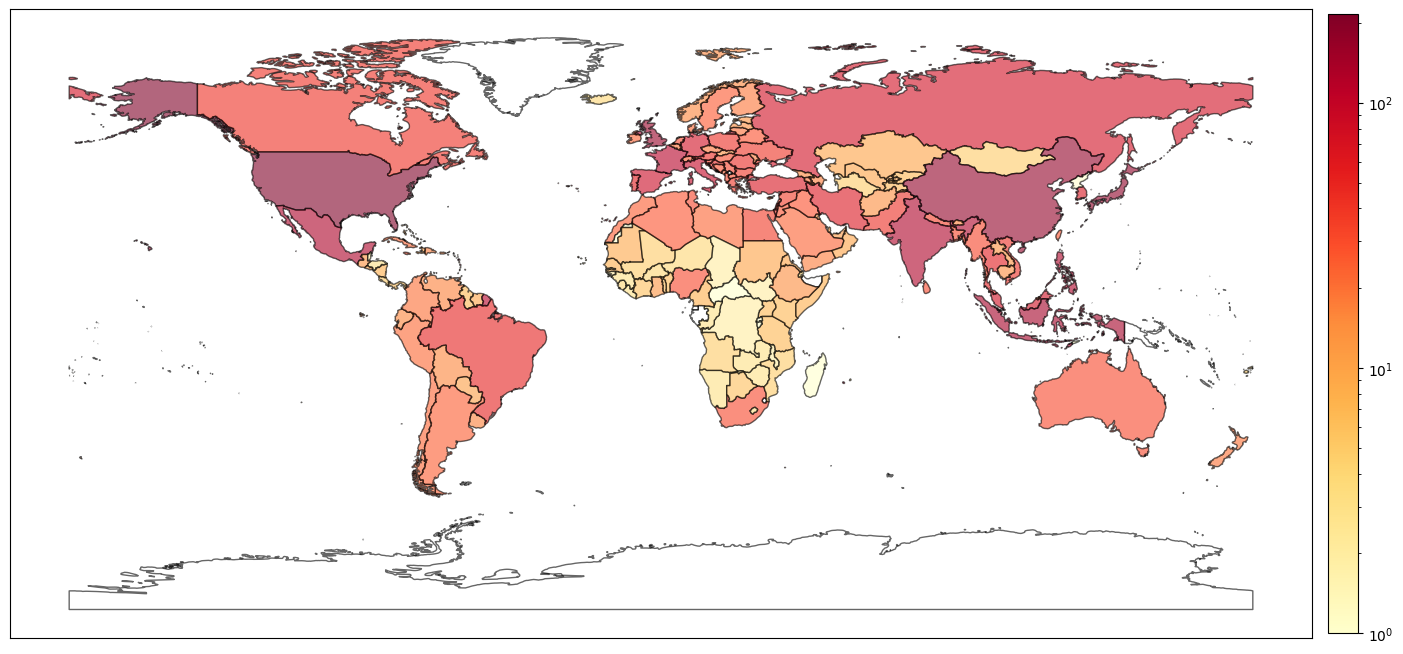

In [10]:
#@title #### Medium Scale Data
show(get_world(world_m), "geodist_m")

In [ ]:
#@title #### Large Scale Data
show(get_world(world_l))

\~Fin.~